In [60]:
import pandas as pd
from sqlalchemy import create_engine
from config import dbConnectionString
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [61]:
engine = create_engine(dbConnectionString)

In [62]:
#import dataframe from SQL database
df = pd.read_sql_query('select * from "cardioData"',con=engine)
df = df.drop(columns = ['index', 'id'])
df

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [63]:
#check target
df['cardiovascular'].value_counts()

False    33931
True     29985
Name: cardiovascular, dtype: int64

In [64]:
df.count()

age               63916
gender            63916
height            63916
weight            63916
cardiovascular    63916
BMI               63916
ap_hi             63916
ap_lo             63916
cholestrol        63916
gloucose          63916
smoke             63916
alchohol          63916
active            63916
dtype: int64

In [65]:
le = LabelEncoder()
df2 = df.copy()
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [66]:
df2['BMI'] = df2['BMI'].astype(float)

In [67]:
df2['BMI_class'] = ''

for i in range(len(df2['age'])):
    if df2['BMI'][i] < 18.5:
        df2['BMI_class'][i] = 'underweight'
    elif df2['BMI'][i] < 24.9 and df2['BMI'][i] > 18.5:
        df2['BMI_class'][i] = 'normal'
    elif df2['BMI'][i] < 29.9 and df2['BMI'][i] > 24.9:
        df2['BMI_class'][i] = 'overweight'
    elif df2['BMI'][i] < 34.9 and df2['BMI'][i] > 29.9:
        df2['BMI_class'][i] = 'obese'
    elif df2['BMI'][i] < 39.9 and df2['BMI'][i] > 34.9:
        df2['BMI_class'][i] = 'obese2'
    else:
        df2['BMI_class'][i] = 'obese3'
        
df2

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active,BMI_class
0,50.4,Female,168.0,62.0,False,23.0,110,80,normal,normal,False,False,True,normal
1,55.4,Male,156.0,85.0,True,46.0,140,90,well above normal,normal,False,False,True,obese3
2,51.7,Male,165.0,64.0,True,25.0,130,70,well above normal,normal,False,False,False,overweight
3,47.9,Male,156.0,56.0,False,20.0,100,60,normal,normal,False,False,False,normal
4,60.0,Male,151.0,67.0,False,30.0,120,80,above normal,above normal,False,False,False,obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34.0,120,80,normal,normal,True,False,True,obese
63912,61.9,Male,158.0,126.0,True,100.0,140,90,above normal,above normal,False,False,True,obese3
63913,52.2,Female,183.0,105.0,True,60.0,180,90,well above normal,normal,False,True,False,obese3
63914,61.5,Male,163.0,72.0,True,32.0,135,80,normal,well above normal,False,False,False,obese


In [68]:
df2['ap_hi_class'] = ''

for i in range(len(df2['age'])):
    if df2['ap_hi'][i] < 120:
        df2['ap_hi_class'][i] = 'normal'
    elif df2['ap_hi'][i] < 129 and df2['ap_hi'][i] >= 120:
        df2['ap_hi_class'][i] = 'elevated'
    elif df2['ap_hi'][i] < 139 and df2['ap_hi'][i] >= 130:
        df2['ap_hi_class'][i] = 'highbloodpressure'
    elif df2['ap_hi'][i] < 180 and df2['ap_hi'][i] >= 140:
        df2['ap_hi_class'][i] = 'highbloodpressure2'
    else:
        df2['ap_hi_class'][i] = 'hypertensive'
        
df2

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __n

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active,BMI_class,ap_hi_class
0,50.4,Female,168.0,62.0,False,23.0,110,80,normal,normal,False,False,True,normal,normal
1,55.4,Male,156.0,85.0,True,46.0,140,90,well above normal,normal,False,False,True,obese3,highbloodpressure2
2,51.7,Male,165.0,64.0,True,25.0,130,70,well above normal,normal,False,False,False,overweight,highbloodpressure
3,47.9,Male,156.0,56.0,False,20.0,100,60,normal,normal,False,False,False,normal,normal
4,60.0,Male,151.0,67.0,False,30.0,120,80,above normal,above normal,False,False,False,obese,elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34.0,120,80,normal,normal,True,False,True,obese,elevated
63912,61.9,Male,158.0,126.0,True,100.0,140,90,above normal,above normal,False,False,True,obese3,highbloodpressure2
63913,52.2,Female,183.0,105.0,True,60.0,180,90,well above normal,normal,False,True,False,obese3,hypertensive
63914,61.5,Male,163.0,72.0,True,32.0,135,80,normal,well above normal,False,False,False,obese,highbloodpressure


In [69]:
df2['ap_lo_class'] = ''

for i in range(len(df2['age'])):
    if df2['ap_lo'][i] < 80:
        df2['ap_lo_class'][i] = 'elevated'
    elif df2['ap_lo'][i] < 80 and df2['ap_lo'][i] >= 89:
        df2['ap_lo_class'][i] = 'highbloodpressure'
    elif df2['ap_lo'][i] < 120 and df2['ap_lo'][i] >= 90:
        df2['ap_lo_class'][i] = 'highbloodpressure2'
    else:
        df2['ap_lo_class'][i] = 'hypertensive'
        
df2

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active,BMI_class,ap_hi_class,ap_lo_class
0,50.4,Female,168.0,62.0,False,23.0,110,80,normal,normal,False,False,True,normal,normal,hypertensive
1,55.4,Male,156.0,85.0,True,46.0,140,90,well above normal,normal,False,False,True,obese3,highbloodpressure2,highbloodpressure2
2,51.7,Male,165.0,64.0,True,25.0,130,70,well above normal,normal,False,False,False,overweight,highbloodpressure,elevated
3,47.9,Male,156.0,56.0,False,20.0,100,60,normal,normal,False,False,False,normal,normal,elevated
4,60.0,Male,151.0,67.0,False,30.0,120,80,above normal,above normal,False,False,False,obese,elevated,hypertensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34.0,120,80,normal,normal,True,False,True,obese,elevated,hypertensive
63912,61.9,Male,158.0,126.0,True,100.0,140,90,above normal,above normal,False,False,True,obese3,highbloodpressure2,highbloodpressure2
63913,52.2,Female,183.0,105.0,True,60.0,180,90,well above normal,normal,False,True,False,obese3,hypertensive,highbloodpressure2
63914,61.5,Male,163.0,72.0,True,32.0,135,80,normal,well above normal,False,False,False,obese,highbloodpressure,hypertensive


In [70]:
#female = 0, male = 1
df2['gender'] = le.fit_transform(df2['gender'])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active,BMI_class,ap_hi_class,ap_lo_class
0,50.4,0,168.0,62.0,False,23.0,110,80,normal,normal,False,False,True,normal,normal,hypertensive
1,55.4,1,156.0,85.0,True,46.0,140,90,well above normal,normal,False,False,True,obese3,highbloodpressure2,highbloodpressure2
2,51.7,1,165.0,64.0,True,25.0,130,70,well above normal,normal,False,False,False,overweight,highbloodpressure,elevated
3,47.9,1,156.0,56.0,False,20.0,100,60,normal,normal,False,False,False,normal,normal,elevated
4,60.0,1,151.0,67.0,False,30.0,120,80,above normal,above normal,False,False,False,obese,elevated,hypertensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,False,34.0,120,80,normal,normal,True,False,True,obese,elevated,hypertensive
63912,61.9,1,158.0,126.0,True,100.0,140,90,above normal,above normal,False,False,True,obese3,highbloodpressure2,highbloodpressure2
63913,52.2,0,183.0,105.0,True,60.0,180,90,well above normal,normal,False,True,False,obese3,hypertensive,highbloodpressure2
63914,61.5,1,163.0,72.0,True,32.0,135,80,normal,well above normal,False,False,False,obese,highbloodpressure,hypertensive


In [71]:
normal_dic = {
    "normal" : 0,
    "above normal" : 1,
    "well above normal" : 2,
}

true_false_dic = {
    True : 1,
    False : 0,
}

BMI_dic = {
    "underweight" : 0,
    "normal" : 1,
    "overweight" : 2, 
    "obese": 3, 
    "obese2" : 4, 
    "obese3" : 5
}

blood_pressure_dic = {
    "normal" : 0,
    "elevated" : 1, 
    "highbloodpressure": 2, 
    "highbloodpressure2": 3,
    "hypertensive" : 4
}

In [72]:
df2['cardiovascular'] = df2['cardiovascular'].apply(lambda x : true_false_dic[x])
df2['smoke'] = df2['smoke'].apply(lambda x : true_false_dic[x])
df2['alchohol'] = df2['alchohol'].apply(lambda x : true_false_dic[x])
df2['active'] = df2['active'].apply(lambda x : true_false_dic[x])

df2['cholestrol'] = df2['cholestrol'].apply(lambda x : normal_dic[x])
df2['gloucose'] = df2['gloucose'].apply(lambda x : normal_dic[x])
df2['BMI_class'] = df2['BMI_class'].apply(lambda x : BMI_dic[x])
df2['ap_hi_class'] = df2['ap_hi_class'].apply(lambda x : blood_pressure_dic[x])
df2['ap_lo_class'] = df2['ap_lo_class'].apply(lambda x : blood_pressure_dic[x])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active,BMI_class,ap_hi_class,ap_lo_class
0,50.4,0,168.0,62.0,0,23.0,110,80,0,0,0,0,1,1,0,4
1,55.4,1,156.0,85.0,1,46.0,140,90,2,0,0,0,1,5,3,3
2,51.7,1,165.0,64.0,1,25.0,130,70,2,0,0,0,0,2,2,1
3,47.9,1,156.0,56.0,0,20.0,100,60,0,0,0,0,0,1,0,1
4,60.0,1,151.0,67.0,0,30.0,120,80,1,1,0,0,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,0,34.0,120,80,0,0,1,0,1,3,1,4
63912,61.9,1,158.0,126.0,1,100.0,140,90,1,1,0,0,1,5,3,3
63913,52.2,0,183.0,105.0,1,60.0,180,90,2,0,0,1,0,5,4,3
63914,61.5,1,163.0,72.0,1,32.0,135,80,0,2,0,0,0,3,2,4


In [144]:
# set X and y values
X = df2.drop(['cardiovascular', 'BMI', 'BMI_class', 'ap_hi_class', 'ap_lo_class'], 1).values
y = df2['cardiovascular']

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [145]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [146]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state = 9)
classifier

LogisticRegression(random_state=9)

In [147]:
# train model using data

classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=9)

In [139]:
## Logistic Regression Score
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7169409850428687
Testing Data Score: 0.7243882595907128


In [140]:
# predictions

predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
60613,1,1
16177,0,0
41906,1,0
36027,0,0
16868,0,0
...,...,...
61468,0,1
3115,1,1
14706,0,0
32159,0,0


In [141]:
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_df.head()

,Prediction,Actual
60613,1,1
16177,0,0
41906,1,0
36027,0,0
16868,0,0


In [142]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[6737, 1746],
       [2658, 4838]], dtype=int64)

In [143]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)

## Logistic Regression Score
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")
print(f"Accuracy: {accuracy}")

Training Data Score: 0.7169409850428687
Testing Data Score: 0.7243882595907128
Accuracy: 0.7243882595907128


In [128]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      8483
           1       0.73      0.65      0.69      7496

    accuracy                           0.72     15979
   macro avg       0.73      0.72      0.72     15979
weighted avg       0.73      0.72      0.72     15979



In [83]:
df2['age'] = df2['age'].astype(float)

In [84]:
df3 = df2.drop(columns = ['BMI'])

In [85]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
corr = df3.corr()

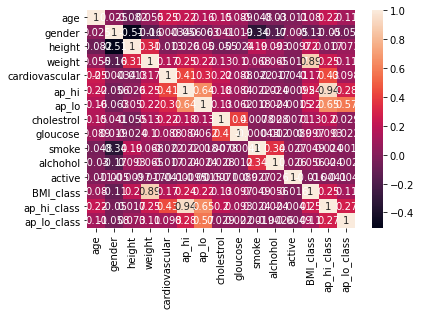

In [86]:
sn.heatmap(df3.corr(), annot = True)
plt.show()

## Generate Correlation Matrix

In [87]:

mask = np.triu(np.ones_like(corr, dtype=bool))

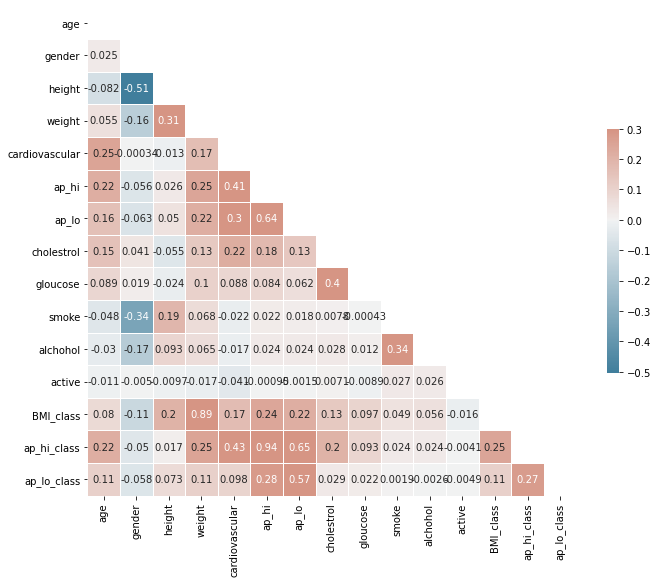

In [88]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sn.diverging_palette(230, 20, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

## Try Bucketing BMI

In [89]:
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active,BMI_class,ap_hi_class,ap_lo_class
0,50.4,0,168.0,62.0,0,23.0,110,80,0,0,0,0,1,1,0,4
1,55.4,1,156.0,85.0,1,46.0,140,90,2,0,0,0,1,5,3,3
2,51.7,1,165.0,64.0,1,25.0,130,70,2,0,0,0,0,2,2,1
3,47.9,1,156.0,56.0,0,20.0,100,60,0,0,0,0,0,1,0,1
4,60.0,1,151.0,67.0,0,30.0,120,80,1,1,0,0,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,0,34.0,120,80,0,0,1,0,1,3,1,4
63912,61.9,1,158.0,126.0,1,100.0,140,90,1,1,0,0,1,5,3,3
63913,52.2,0,183.0,105.0,1,60.0,180,90,2,0,0,1,0,5,4,3
63914,61.5,1,163.0,72.0,1,32.0,135,80,0,2,0,0,0,3,2,4


In [90]:
# set X and y values
X = df2.drop(['cardiovascular', 'BMI', 'height', 'weight'], 1).values
y = df2['cardiovascular']

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [91]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [92]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state = 9)
classifier

LogisticRegression(random_state=9)

In [93]:
# train model using data

classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=9)

In [94]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7182969313891149
Testing Data Score: 0.7243256774516553


In [95]:
# predictions

predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
60613,1,1
16177,0,0
41906,1,0
36027,0,0
16868,0,0
...,...,...
61468,0,1
3115,1,1
14706,0,0
32159,0,0


In [96]:
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_df.head()

,Prediction,Actual
60613,1,1
16177,0,0
41906,1,0
36027,0,0
16868,0,0


In [97]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[6769, 1714],
       [2691, 4805]], dtype=int64)

In [98]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7243256774516553


In [99]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.75      8483
           1       0.74      0.64      0.69      7496

    accuracy                           0.72     15979
   macro avg       0.73      0.72      0.72     15979
weighted avg       0.73      0.72      0.72     15979



## Bucket Blood Pressure

In [116]:
# set X and y values
X = df2.drop(['cardiovascular', 'BMI', 'BMI_class', 'ap_hi', 'ap_lo'], 1).values
y = df2['cardiovascular']

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [115]:
df2.drop(['cardiovascular', 'BMI', 'BMI_class', 'ap_hi', 'ap_lo'], 1)

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,gender,height,weight,cholestrol,gloucose,smoke,alchohol,active,ap_hi_class,ap_lo_class
0,50.4,0,168.0,62.0,0,0,0,0,1,0,4
1,55.4,1,156.0,85.0,2,0,0,0,1,3,3
2,51.7,1,165.0,64.0,2,0,0,0,0,2,1
3,47.9,1,156.0,56.0,0,0,0,0,0,0,1
4,60.0,1,151.0,67.0,1,1,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,0,0,1,0,1,1,4
63912,61.9,1,158.0,126.0,1,1,0,0,1,3,3
63913,52.2,0,183.0,105.0,2,0,0,1,0,4,3
63914,61.5,1,163.0,72.0,0,2,0,0,0,2,4


In [118]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state = 9)

classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Training Data Score: 0.7185263992323258
Testing Data Score: 0.7242630953125978
Accuracy: 0.7243256774516553


## Bucket both

In [108]:
# set X and y values
X = df2.drop(['cardiovascular', 'BMI', 'weight', 'height', 'ap_hi', 'ap_lo'], 1).values
y = df2['cardiovascular']

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [106]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state = 9)

classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Training Data Score: 0.7184220956672299
Testing Data Score: 0.7236372739220227
Accuracy: 0.7243256774516553


## Using BMI instead of Height/Weight

In [150]:
# set X and y values
X = df2.drop(['cardiovascular', 'BMI_class', 'weight', 'height', 'ap_hi_class', 'ap_lo_class'], 1).values
y = df2['cardiovascular']

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [151]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state = 9)

classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Training Data Score: 0.7176711099985398
Testing Data Score: 0.7252018273984605
Accuracy: 0.7243882595907128
